In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pipe11/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [106]:
corpus = pd.read_csv('../data/corpus_spanish_v3.csv', index_col = 0)

In [107]:
corpus.head()

,Category,Topic,Source,Headline,Text,Link
0,True,Science,El país,La NASA recupera el contacto con un satélite d...,La NASA recupera el contacto con un satélite d...,https://elpais.com/elpais/2018/02/01/ciencia/1...
1,True,Economy,El financiero,AMLO aceleraría el consumo y el crecimiento ec...,AMLO aceleraría el consumo y el crecimiento ec...,http://www.elfinanciero.com.mx/economia/amlo-a...
2,Fake,Sport,actualidadpanamericana.com,Compañero de James se ‘calvea’ y le juega pesa...,Al borde de un colapso nervioso quedó el hábil...,http://www.actualidadpanamericana.com/companer...
3,Fake,Politics,actualidadpanamericana.com,Dian gravará este año a los niños que recojan ...,"Mediante pupitrazo de último minuto anoche, el...",http://www.actualidadpanamericana.com/dian-gra...
4,Fake,Politics,actualidadpanamericana.com,Uribe asegura que insultó 358 guerrilleros,Muy temprano esta mañana el expresidente y aho...,http://www.actualidadpanamericana.com/uribe-as...


Checking values types

In [108]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  3974 non-null   object
 1   Topic     3974 non-null   object
 2   Source    3974 non-null   object
 3   Headline  3974 non-null   object
 4   Text      3974 non-null   object
 5   Link      3974 non-null   object
dtypes: object(6)
memory usage: 217.3+ KB


Checking if there are NA Values

In [109]:
corpus.isnull().sum()

Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

Number of news per Category 'Fake' and 'True'

Category
Fake    1928
True    2046
dtype: int64


<AxesSubplot:xlabel='Category'>

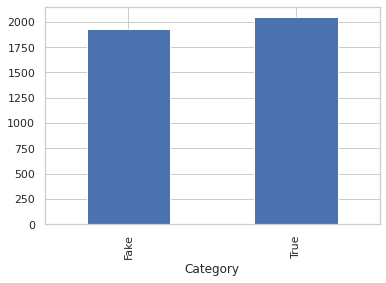

In [110]:
plot_cat = corpus.groupby('Category').size()
print(plot_cat)

plot_cat.plot.bar()

### Total news in the corpus per Topic

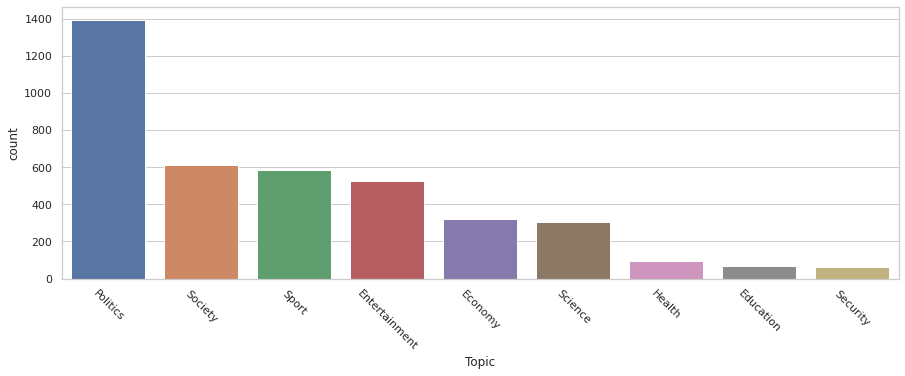

In [111]:
plot_topic = corpus.groupby('Topic').size().sort_values(ascending = False)

plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, data = corpus)
sticks = plt.xticks(rotation = -45)

### Fake news and True news per topic

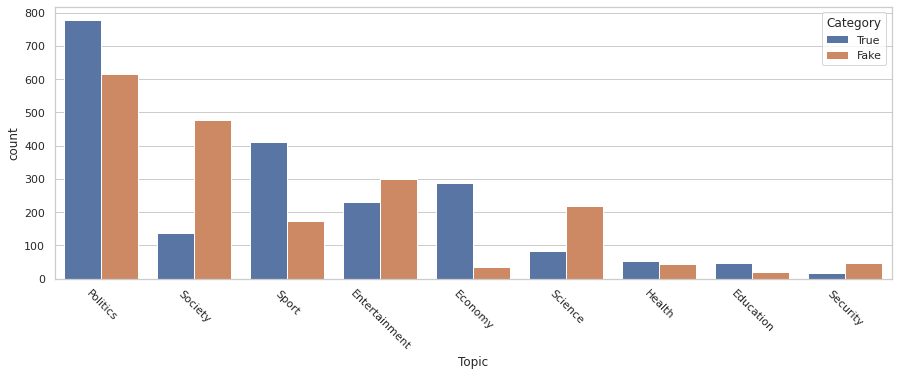

In [112]:
plt.figure(figsize = (15,5))
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Topic' , order = corpus['Topic'].value_counts().index, hue = 'Category', data = corpus)
sticks = plt.xticks(rotation = -45)

### Wordcloud

In [ ]:
import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

<Figure size 432x288 with 0 Axes>

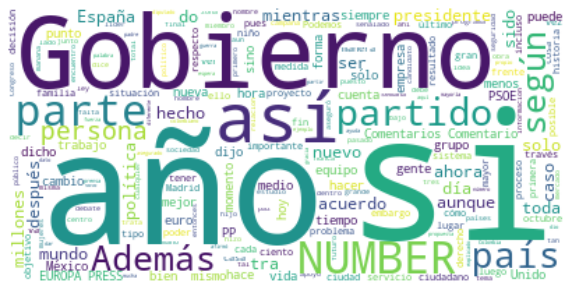

In [121]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

spanish_stopwords = stopwords.words('spanish')
text = " ".join(text for text in corpus.Text)

wordcloud = WordCloud(stopwords = spanish_stopwords, background_color = "white").generate(text)
plt.figure()
plt.figure(figsize = [10, 10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0 , y = 0)
plt.show()

<Figure size 432x288 with 0 Axes>

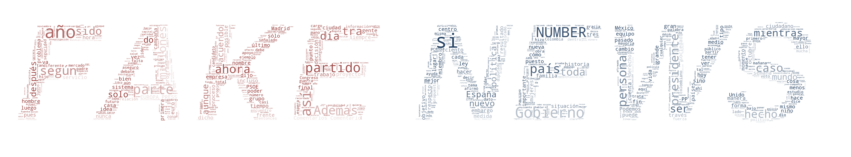

In [132]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

spanish_stopwords = stopwords.words('spanish')
text_fake = " ".join(text for text in corpus[corpus['Category'] == 'Fake'].Text)

mask = np.array(Image.open('../imgs/FAKE_NEWS_title.png'))
wordcloud_fake = WordCloud(stopwords = spanish_stopwords, background_color = 'white', mode = 'RGBA',max_words = 1000,
                           mask = mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure()
plt.figure(figsize = [15, 15])
plt.imshow(wordcloud_fake.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis("off")
plt.margins(x = 0 , y = 0)
plt.show()

### Boxplots with features extracted

In [81]:
df_features = pd.read_csv('../data/spanish_corpus_features_v6.csv')

df_features.columns

Index(['topic', 'text', 'headline', 'words_h', 'word_size_h',
       'avg_syllables_word_h', 'unique_words_h', 'ttr_h', 'mltd_h', 'sents',
       'words', 'avg_words_sent', 'avg_word_size', 'avg_syllables_word',
       'unique_words', 'ttr', 'mltd', 'huerta_score', 'szigriszt_score',
       'upper_case_ratio', 'entity_ratio', 'quotes', 'quotes_ratio',
       'propn_ratio', 'noun_ratio', 'adp_ratio', 'det_ratio', 'punct_ratio',
       'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio', 'label'],
      dtype='object')

<AxesSubplot:xlabel='Text stylometric features', ylabel='value'>

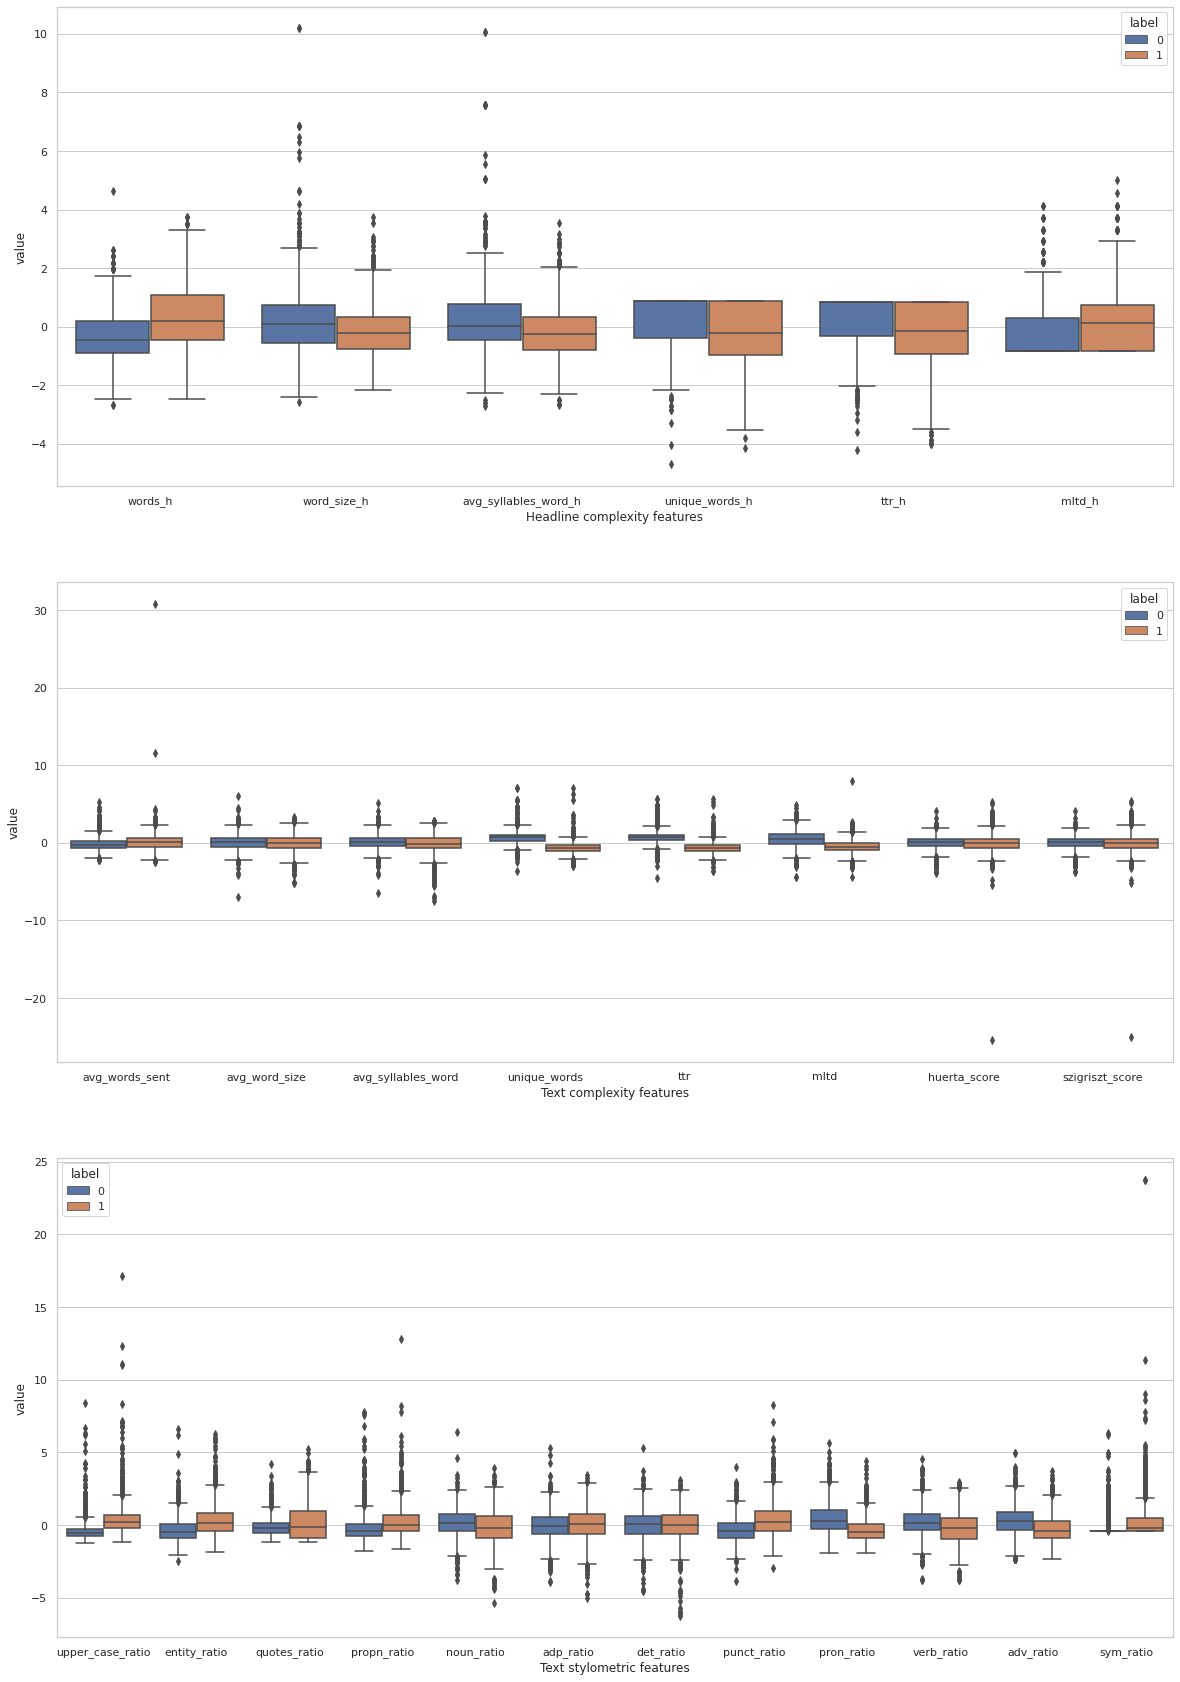

In [90]:
df_features = pd.read_csv('../data/spanish_corpus_features_v6.csv')

import seaborn as sns
from matplotlib import pyplot as plt

# All features don't fit well in 1 graphic so we divide it in 3 graphics

features1 = ['words_h', 'word_size_h','avg_syllables_word_h', 'unique_words_h', 
             'ttr_h', 'mltd_h']

features2 = ['avg_words_sent', 'avg_word_size', 'avg_syllables_word', 'unique_words', 
             'ttr', 'mltd', 'huerta_score', 'szigriszt_score']

features3 = ['upper_case_ratio', 'entity_ratio', 'quotes_ratio', 'propn_ratio', 
             'noun_ratio', 'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 
             'sym_ratio']

y = df_features['label']
x1 = df_features[features1]
x2 = df_features[features2]
x3 = df_features[features3]

# standarization
x1_st = (x1 - x1.mean()) / (x1.std())
x2_st = (x2 - x2.mean()) / (x2.std())
x3_st = (x3 - x3.mean()) / (x3.std())

data1 = pd.concat([y, x1_st.iloc[:,]], axis = 1)
data1 = pd.melt(data1, id_vars = "label", var_name = "Headline complexity features", value_name = 'value')

data2 = pd.concat([y, x2_st.iloc[:,]], axis = 1)
data2 = pd.melt(data2, id_vars = "label", var_name = "Text complexity features", value_name = 'value')

data3 = pd.concat([y, x3_st.iloc[:,]], axis = 1)
data3 = pd.melt(data3, id_vars = "label", var_name = "Text stylometric features", value_name = 'value')

f, axs = plt.subplots(3, figsize = (20, 30))

sns.boxplot(x = "Headline complexity features", y = "value", hue = "label", data = data1, ax = axs[0])
sns.boxplot(x = "Text complexity features", y = "value", hue = "label", data = data2, ax = axs[1])
sns.boxplot(x = "Text stylometric features", y = "value", hue = "label", data = data3, ax = axs[2])